In [147]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Pandas (again)

URL https://github.com/FIIT-IAU

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Exercise task

dataset: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset

In [149]:
import seaborn as sns

In [150]:
cars = sns.load_dataset('car_crashes')

In [151]:
cars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#### 1. basic properties, descriptive statistics, etc

In [152]:
# pocet riadkov a stpcov
cars.shape

(51, 8)

In [153]:
# typy dat v stlpcoch
cars.dtypes

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

In [154]:
# priemer, min, max, odchylka
cars.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [155]:
cars.index

RangeIndex(start=0, stop=51, step=1)

In [156]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


#### 2. basic distribution graphs, try to find correlations (primarily with the total number of drivers with fatal accidents)

In [157]:
sns.set(style="whitegrid", palette="PiYG")

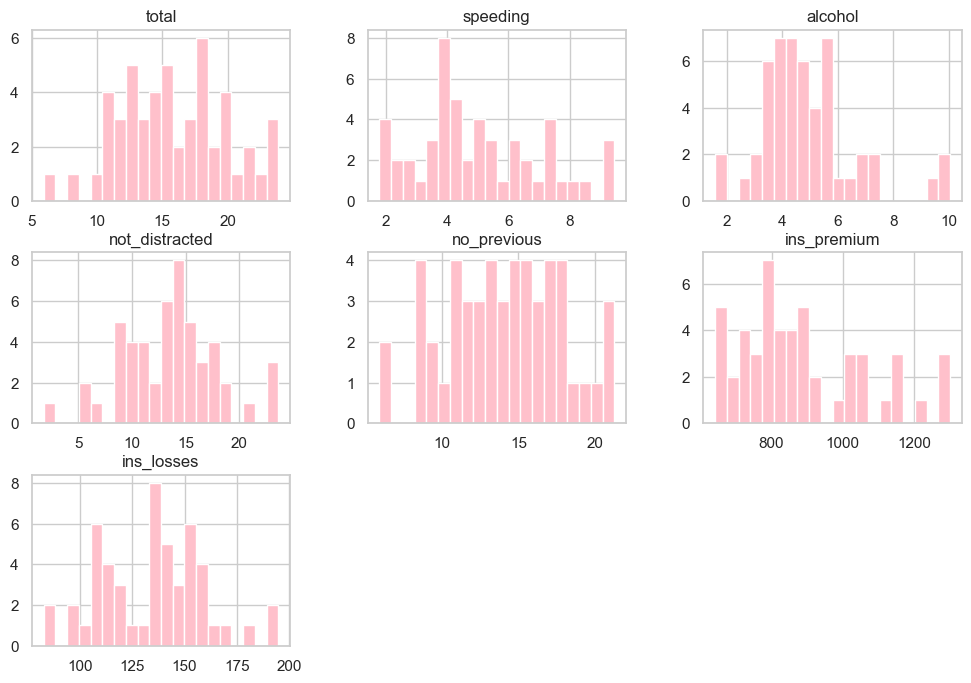

In [158]:
cars.hist(figsize=(12, 8), bins = 20, color="pink")
plt.title("Basic distribution graphs")
plt.show()

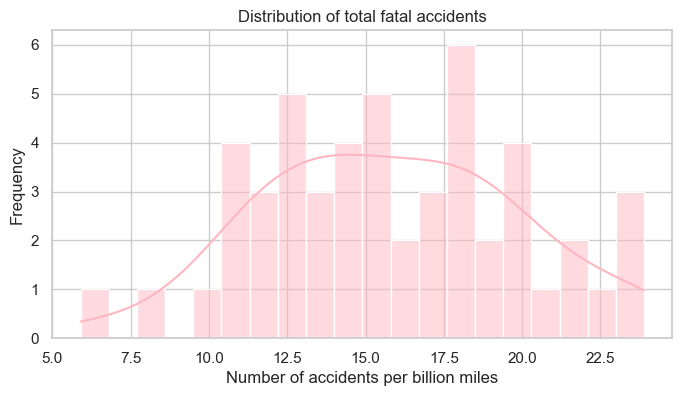

In [159]:
plt.figure(figsize=(8,4))
sns.histplot(cars['total'], bins=20, kde=True, color='lightpink')
plt.title("Distribution of total fatal accidents")
plt.xlabel("Number of accidents per billion miles")
plt.ylabel("Frequency")
plt.show()

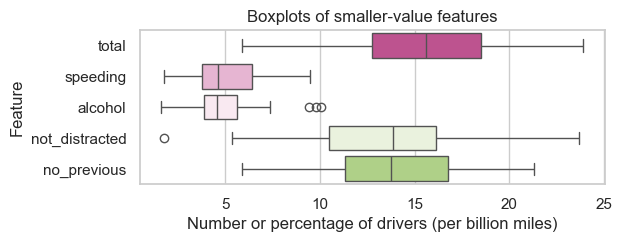

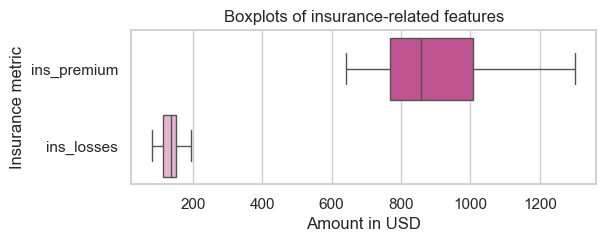

In [160]:
# menšie hodnoty
small_vars = ['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous']

plt.figure(figsize=(6,2))
sns.boxplot(
    data=cars[small_vars], 
    orient='h', 
    showfliers=True
)
plt.title("Boxplots of smaller-value features")
plt.xlabel("Number or percentage of drivers (per billion miles)")
plt.ylabel("Feature")
plt.show()

# poistné metriky
plt.figure(figsize=(6,2))
sns.boxplot(
    data=cars[['ins_premium', 'ins_losses']], 
    orient='h', 
    showfliers=True
)
plt.title("Boxplots of insurance-related features")
plt.xlabel("Amount in USD")
plt.ylabel("Insurance metric")
plt.show()


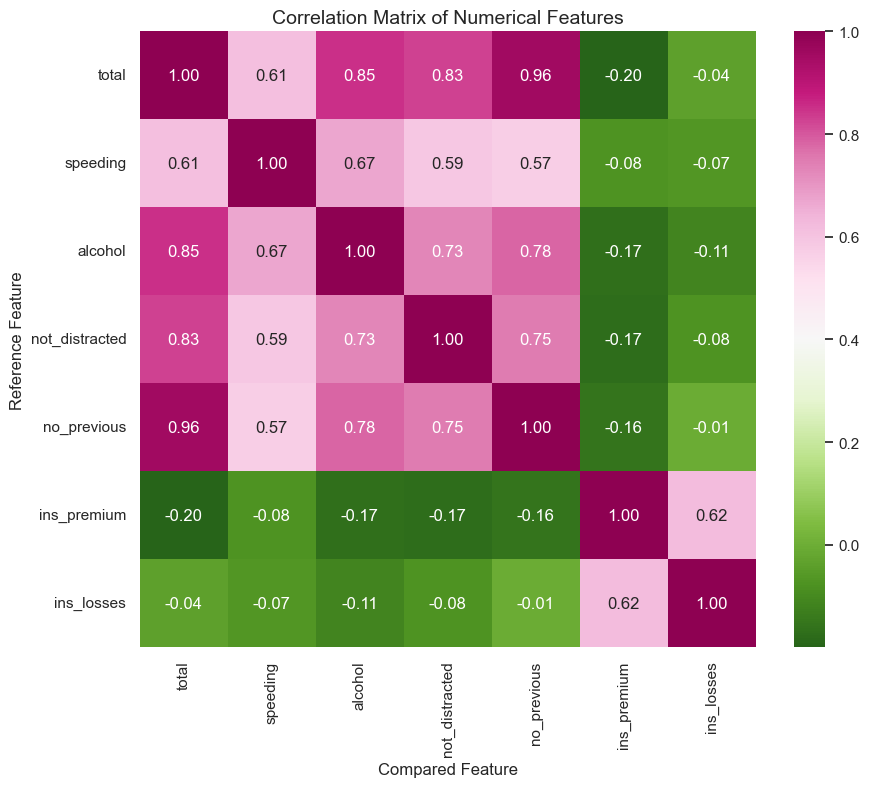

In [161]:
corr = cars.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="PiYG_r", square=True)

plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.xlabel("Compared Feature", fontsize=12)
plt.ylabel("Reference Feature", fontsize=12)

plt.show()

#### 3. find the state with the highest / lowest number of accidents; certainly an average number for individual countries

In [162]:
# najvyssi pocet nehod
max_state = cars.loc[cars['total'].idxmax(), ['abbrev', 'total']]
print(f"State with the highest number of accidents: {max_state['abbrev']} {max_state['total']}")

# s najnizsim poctom nehod
min_state = cars.loc[cars['total'].idxmin(), ['abbrev', 'total']]
print(f"State with the lowest number of accidents: {min_state['abbrev']} {min_state['total']}")

#total average
avg_total = cars['total'].mean()
print(f"Average number of fatal accidents across all states: {avg_total:.2f}")

# an average number for individual countries
state_avg = cars.groupby('abbrev').mean(numeric_only=True).round(2).reset_index()
state_avg.head()

State with the highest number of accidents: ND 23.9
State with the lowest number of accidents: DC 5.9
Average number of fatal accidents across all states: 15.79


,abbrev,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,AK,18.1,7.42,4.53,16.29,17.01,1053.48,133.93
1,AL,18.8,7.33,5.64,18.05,15.04,784.55,145.08
2,AR,22.4,4.03,5.82,21.06,21.28,827.34,142.39
3,AZ,18.6,6.51,5.21,15.62,17.86,899.47,110.35
4,CA,12.0,4.20,3.36,10.92,10.68,878.41,165.63


#### 4. divide evenly into 4 groups according to the number of accidents, for each group show the average values ​​of all other columns

In [163]:
cars['accident_group'] = pd.qcut(cars['total'], q=4, labels=['low', 'medium', 'high', 'very high'])
cars['accident_group'].value_counts()

accident_group
low          13
medium       13
very high    13
high         12
Name: count, dtype: int64

In [164]:
group_means = cars.groupby('accident_group').mean(numeric_only=True).round(2)
group_means

/var/folders/j_/bs2_06f5405cy265hh1ttq540000gn/T/ipykernel_13794/1711569973.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = cars.groupby('accident_group').mean(numeric_only=True).round(2)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accident_group,,,,,,,
low,10.75,3.45,3.20,9.32,9.30,996.76,144.91
medium,14.22,4.27,4.30,12.28,12.89,794.44,120.79
high,17.31,5.86,5.19,13.87,15.69,883.65,135.29
very high,20.99,6.49,6.88,18.85,18.26,872.73,137.04
